In [4]:
import pandas as pd
import numpy as np

In [5]:
spx_df = pd.read_csv('SPX.csv')


In [6]:
spx_df.head

<bound method NDFrame.head of            Index     SPX.Open     SPX.High      SPX.Low    SPX.Close  \
0     2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990   
1     2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020   
2     2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015   
3     2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941   
4     2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980   
...          ...          ...          ...          ...          ...   
3517  2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883   
3518  2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000   
3519  2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078   
3520  2023-12-28  4786.439941  4793.299805  4780.979980  4783.350098   
3521  2023-12-29  4782.879883  4788.430176  4751.990234  4769.830078   

        SPX.Volume  SPX.Adjusted  
0     3.991400e+09   1132.989990  
1     2.491020e+09   1136.520020  


In [7]:
spx_df['Index'] = pd.to_datetime(spx_df['Index']) 
spx_df.set_index('Index', inplace=True)

In [8]:
spx_df.head

<bound method NDFrame.head of                SPX.Open     SPX.High      SPX.Low    SPX.Close    SPX.Volume  \
Index                                                                          
2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990  3.991400e+09   
2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020  2.491020e+09   
2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015  4.972660e+09   
2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941  5.270680e+09   
2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980  4.389590e+09   
...                 ...          ...          ...          ...           ...   
2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883  3.046770e+09   
2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000  2.513910e+09   
2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078  2.748450e+09   
2023-12-28  4786.439941  4793.299805  4780.979980  4783.350098  2.698860e+09   
2023-12-29

In [9]:
spx_prices = spx_df['SPX.Adjusted']
spx_prices.head

<bound method NDFrame.head of Index
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
                 ...     
2023-12-22    4754.629883
2023-12-26    4774.750000
2023-12-27    4781.580078
2023-12-28    4783.350098
2023-12-29    4769.830078
Name: SPX.Adjusted, Length: 3522, dtype: float64>

In [10]:
spx_returns = 100 * np.log(spx_prices / spx_prices.shift(1))
spx_returns.head

<bound method NDFrame.head of Index
2010-01-04         NaN
2010-01-05    0.311083
2010-01-06    0.054537
2010-01-07    0.399322
2010-01-08    0.287758
                ...   
2023-12-22    0.165868
2023-12-26    0.422276
2023-12-27    0.142944
2023-12-28    0.037011
2023-12-29   -0.283048
Name: SPX.Adjusted, Length: 3522, dtype: float64>

In [11]:
spx_returns = spx_returns.dropna()

<Axes: title={'center': "The Transformed Time Series we'll work on"}, xlabel='Index', ylabel='Return %'>

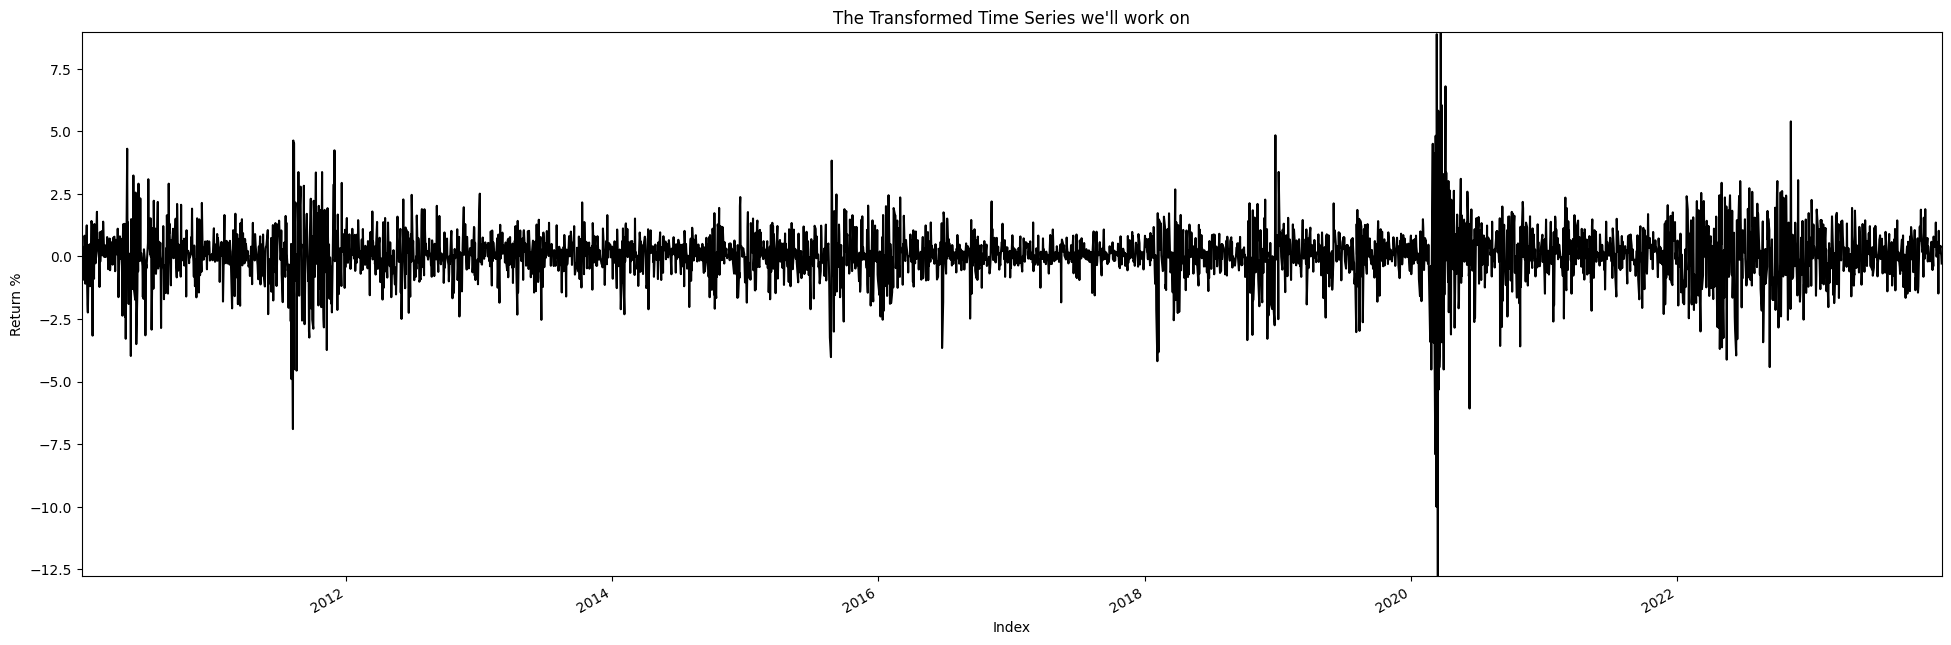

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (24, 8))
plt.title(f"The Transformed Time Series we'll work on") 
plt.xlabel("Time")
plt.ylabel("Return %")
plt.autoscale(tight=True)
spx_returns.plot(color='black')


 Returns:
Mean: 0.04082506486705168
Variance: 1.224615737485457
Skewness: -0.7218954644586842
Kurtosis: 13.162662730391368



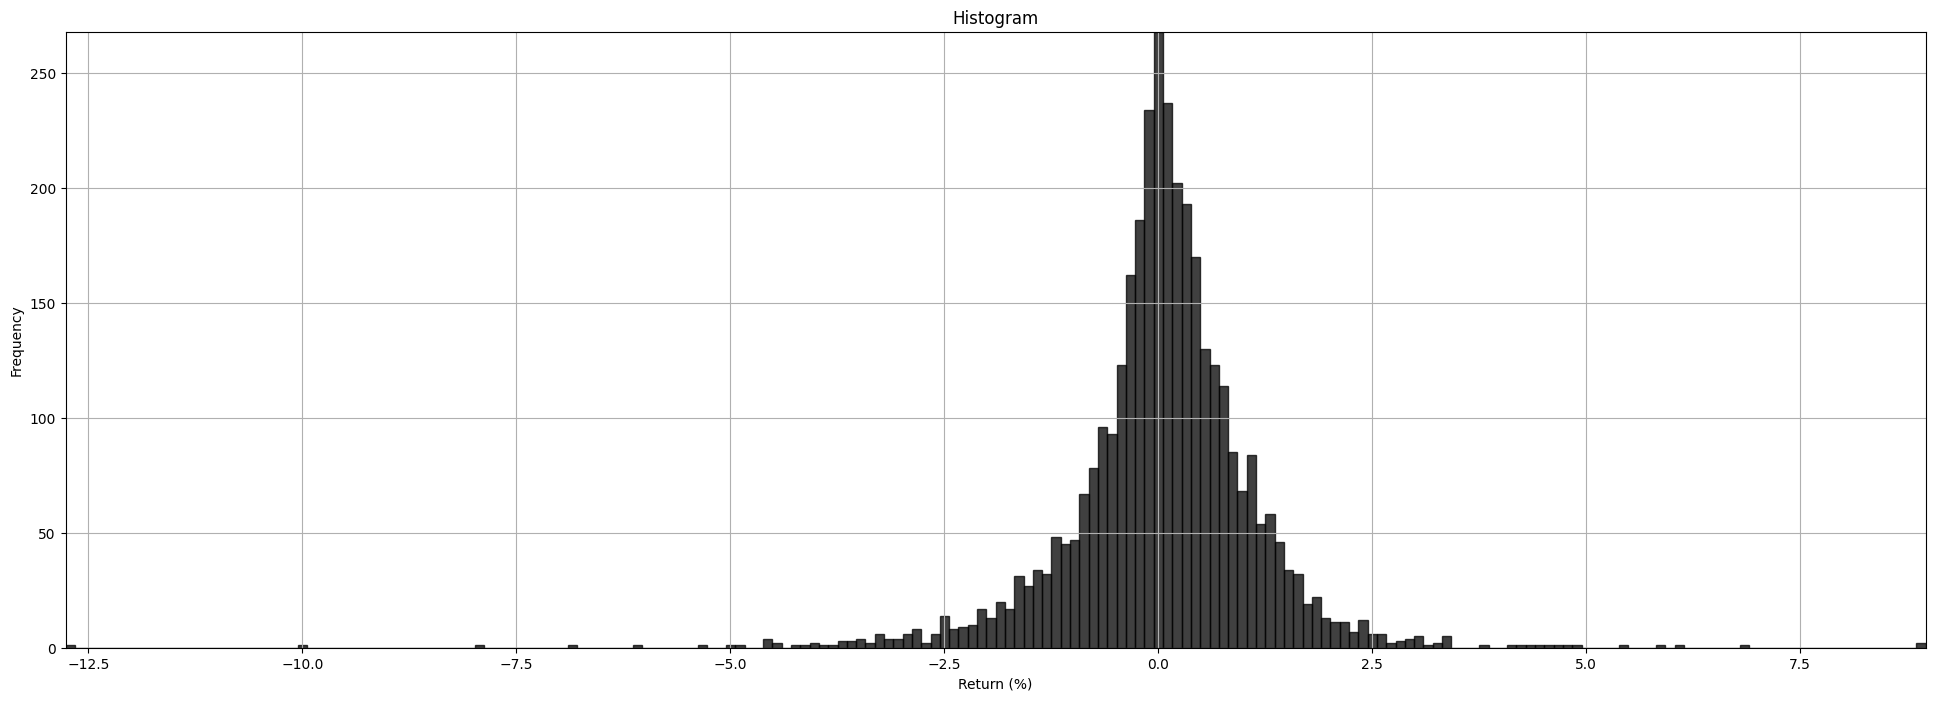

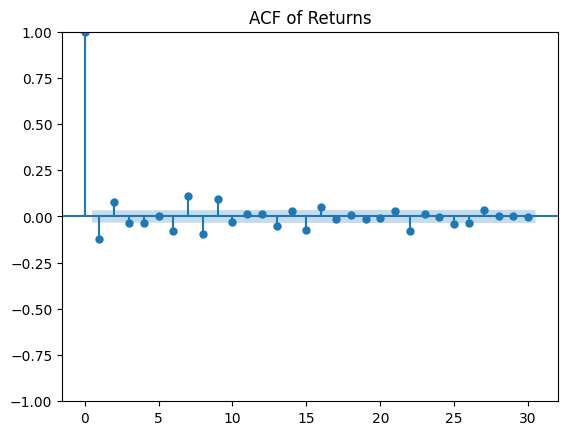

In [13]:
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
returns = spx_returns
mean = np.mean(returns)
variance = np.var(returns) 
skewness = stats.skew(returns) 
kurtosis = stats.kurtosis(returns)
print(f" Returns:\nMean: {mean}\nVariance: {variance}\nSkewness: {skewness}\nKurtosis: {kurtosis}\n")
    # Plot Histogram
plt.figure(figsize=(24,8))
plt.hist(returns, bins=200, alpha=0.75, edgecolor='black', color='black') 
plt.title(f"Histogram") 
plt.xlabel("Return (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.autoscale(tight=True)
plt.show()
# Plot ACF
plot_acf(returns, lags=30, title=f"ACF of Returns") 
plt.show()

<Figure size 640x480 with 0 Axes>

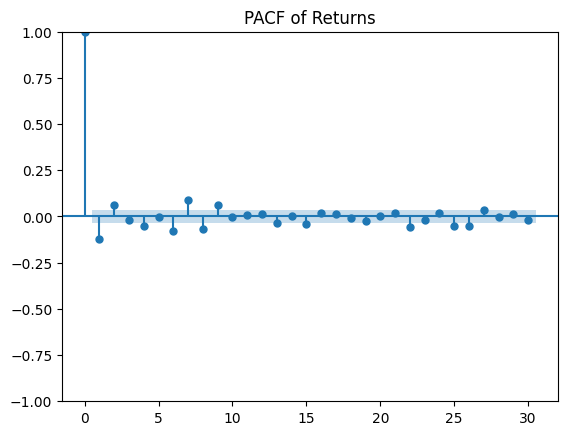

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plot_pacf(returns, lags=30, title="PACF of Returns")
plt.show()

In [15]:
returns.head


<bound method NDFrame.head of Index
2010-01-05    0.311083
2010-01-06    0.054537
2010-01-07    0.399322
2010-01-08    0.287758
2010-01-11    0.174523
                ...   
2023-12-22    0.165868
2023-12-26    0.422276
2023-12-27    0.142944
2023-12-28    0.037011
2023-12-29   -0.283048
Name: SPX.Adjusted, Length: 3521, dtype: float64>

<Axes: title={'center': 'Deviations'}, xlabel='Index', ylabel='deviation from mean'>

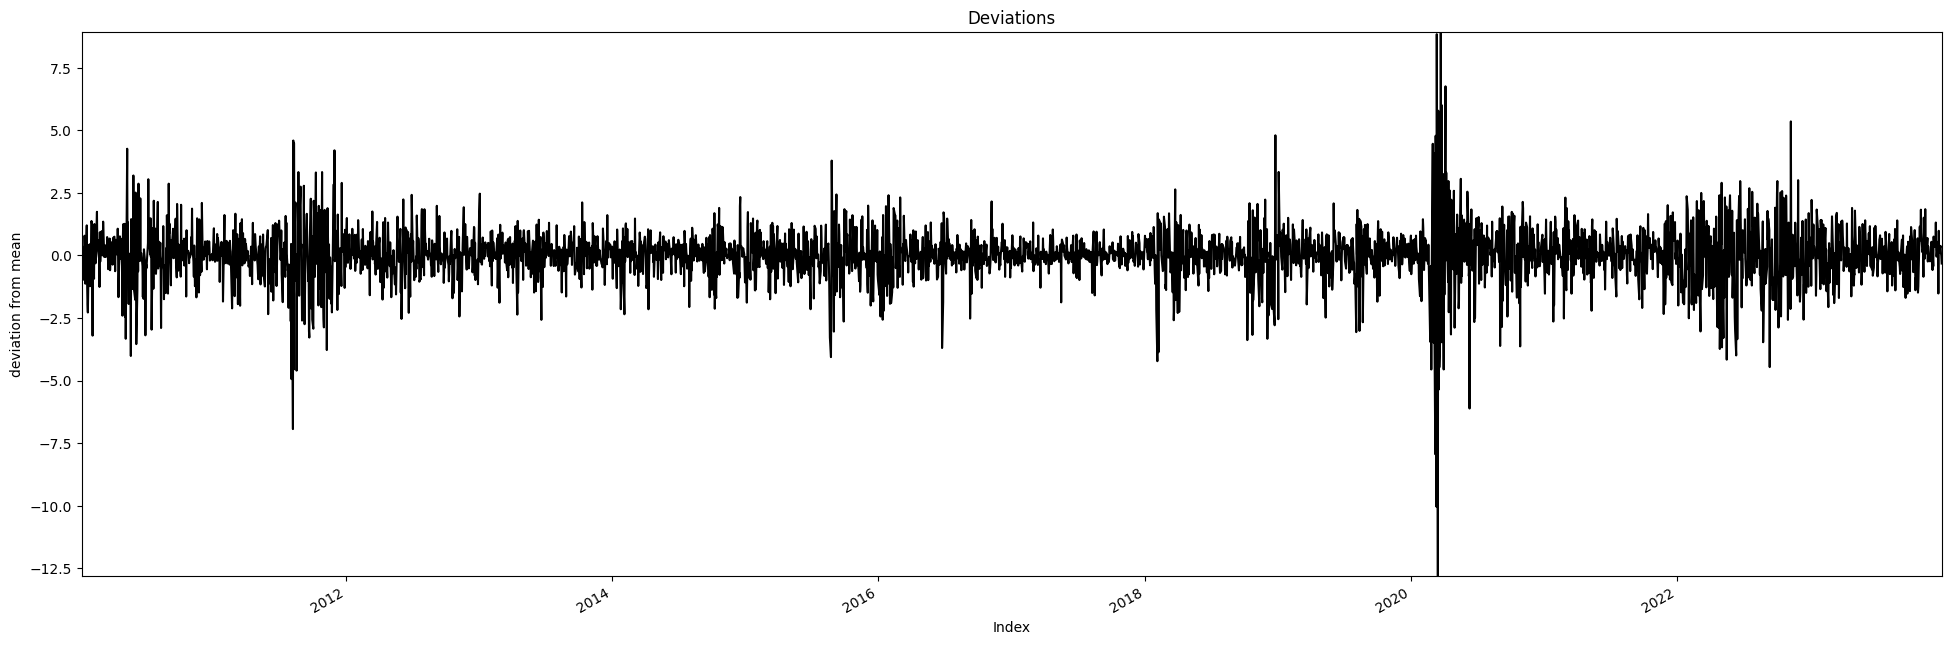

In [16]:

deviations = returns-mean
plt.figure(figsize = (24, 8))
plt.title("Deviations") 
plt.xlabel("Time")
plt.ylabel("deviation from mean")
plt.autoscale(tight=True)
deviations.plot(color = 'black')

<Axes: title={'center': 'Squared Deviations'}, xlabel='Index', ylabel='squared deviation from mean'>

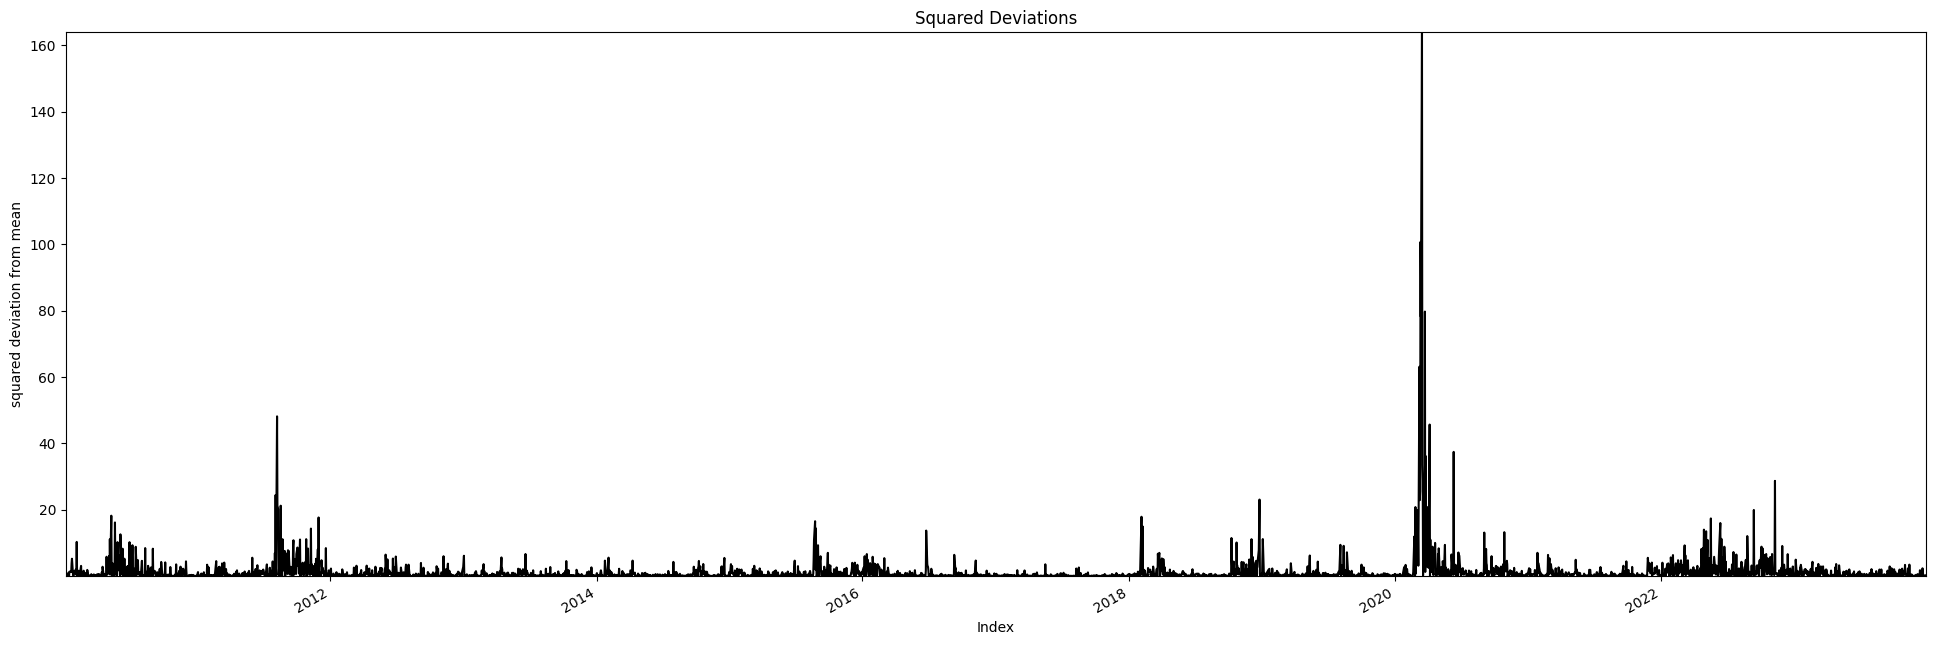

In [17]:
squared_deviations = deviations**2
plt.figure(figsize = (24, 8))
plt.title("Squared Deviations") 
plt.xlabel("Time")
plt.ylabel("squared deviation from mean")
plt.autoscale(tight=True)
squared_deviations.plot(color = 'black')

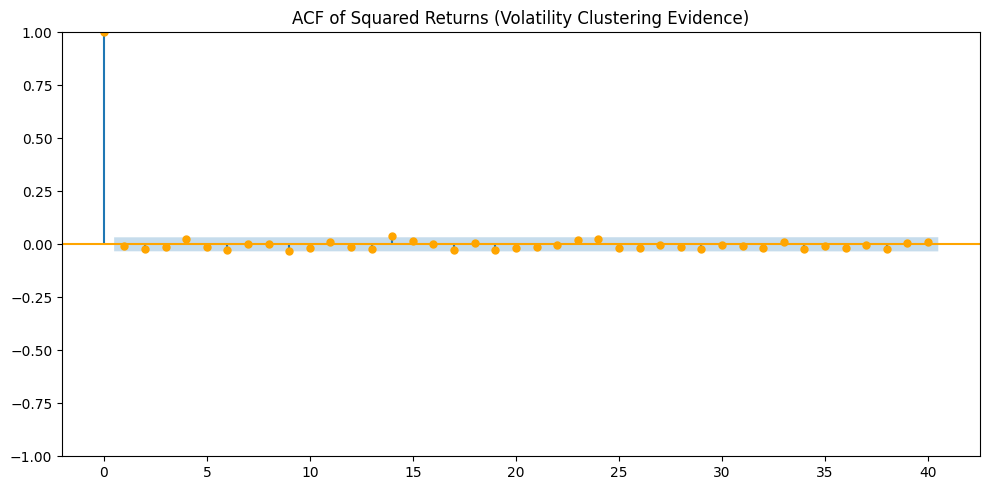

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(squared_deviations, lags=40, ax=ax, color='orange')
plt.title("ACF of Squared Returns (Volatility Clustering Evidence)")
plt.tight_layout()

In [47]:
from statsmodels.stats.diagnostic import het_arch
print(het_arch(returns))


(1292.8270678848103, 1.3511117314277376e-271, 203.9919733977648, 0.0)


<Axes: title={'center': 'Standard Deviations'}, xlabel='Index', ylabel='Standard deviation from mean'>

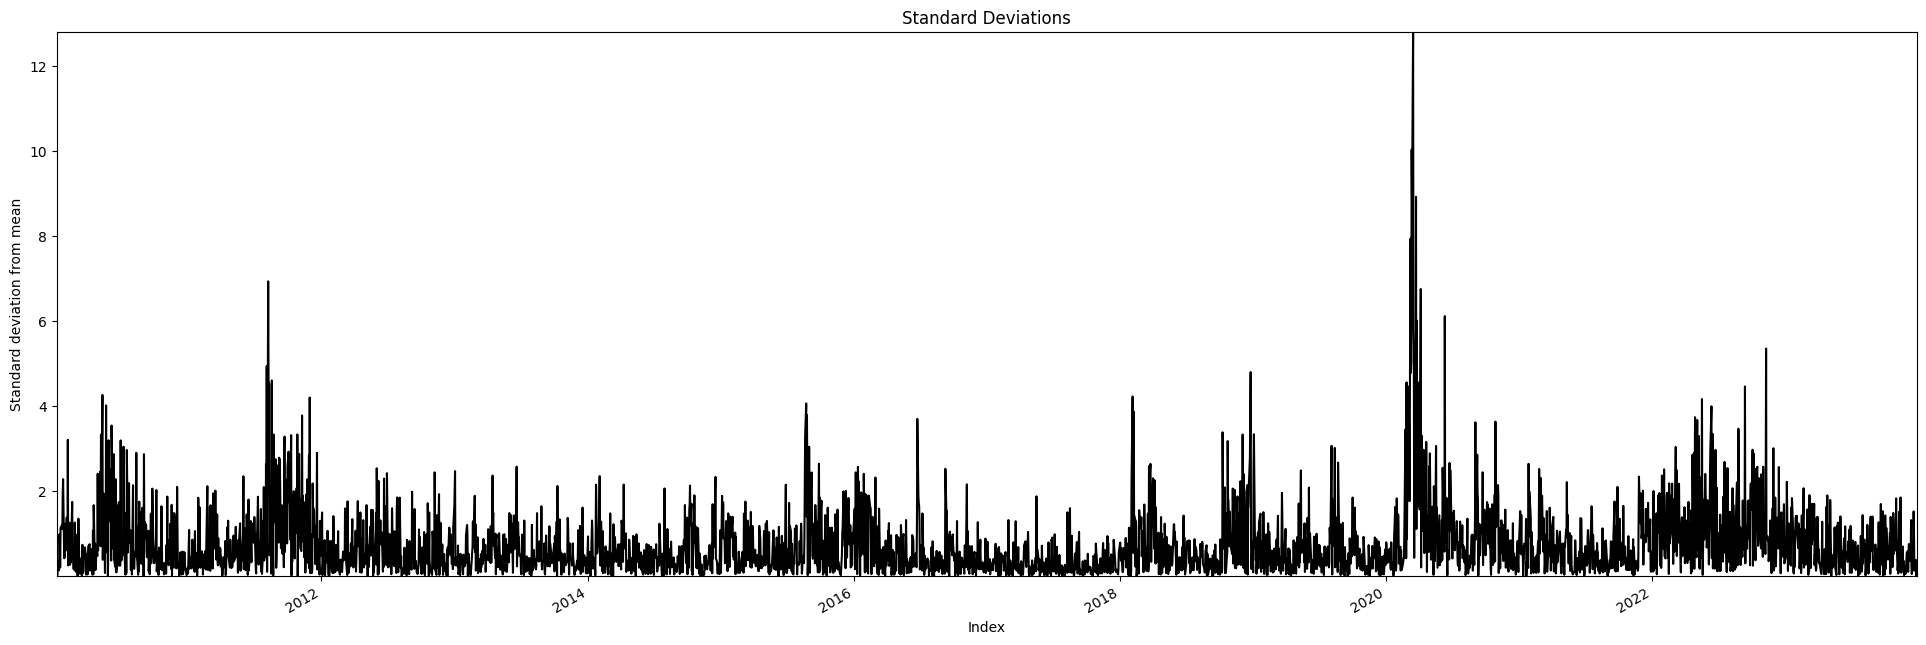

In [18]:
std_deviations = np.abs(deviations)
plt.figure(figsize = (24, 8))
plt.title("Standard Deviations") 
plt.xlabel("Time")
plt.ylabel("Standard deviation from mean")
plt.autoscale(tight=True)
std_deviations.plot(color = 'black')

<Axes: xlabel='Index'>

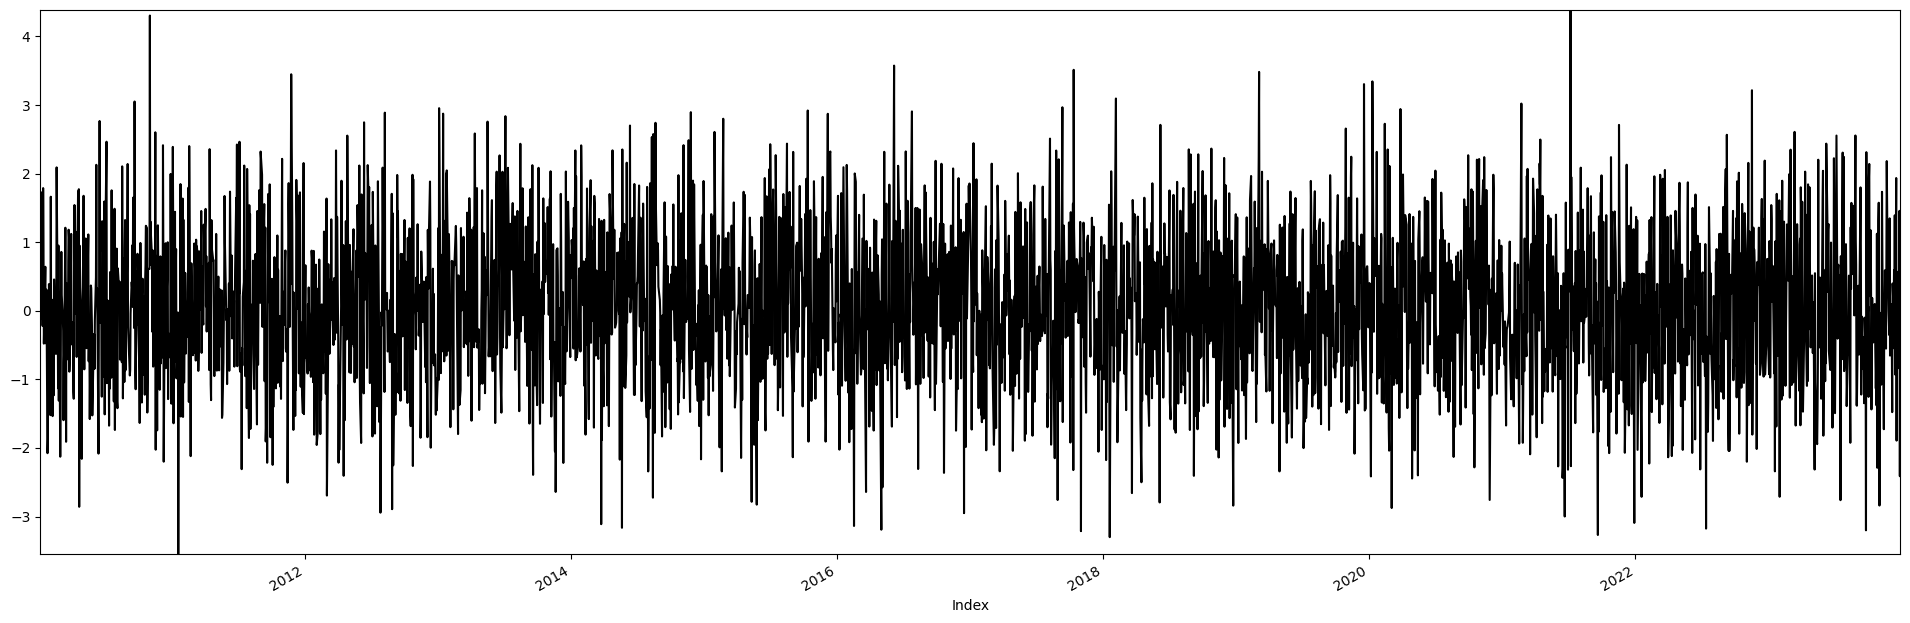

In [19]:
np.random.seed(42)  # For reproducibility
random_walk = np.random.normal(mean, np.sqrt(variance), len(returns))
random_walk_df =pd.DataFrame({'rwreturns':random_walk}, index=returns.index)
plt.figure(figsize = (24, 8))
plt.autoscale(tight=True)
random_walk_df.rwreturns.plot(color = 'black')

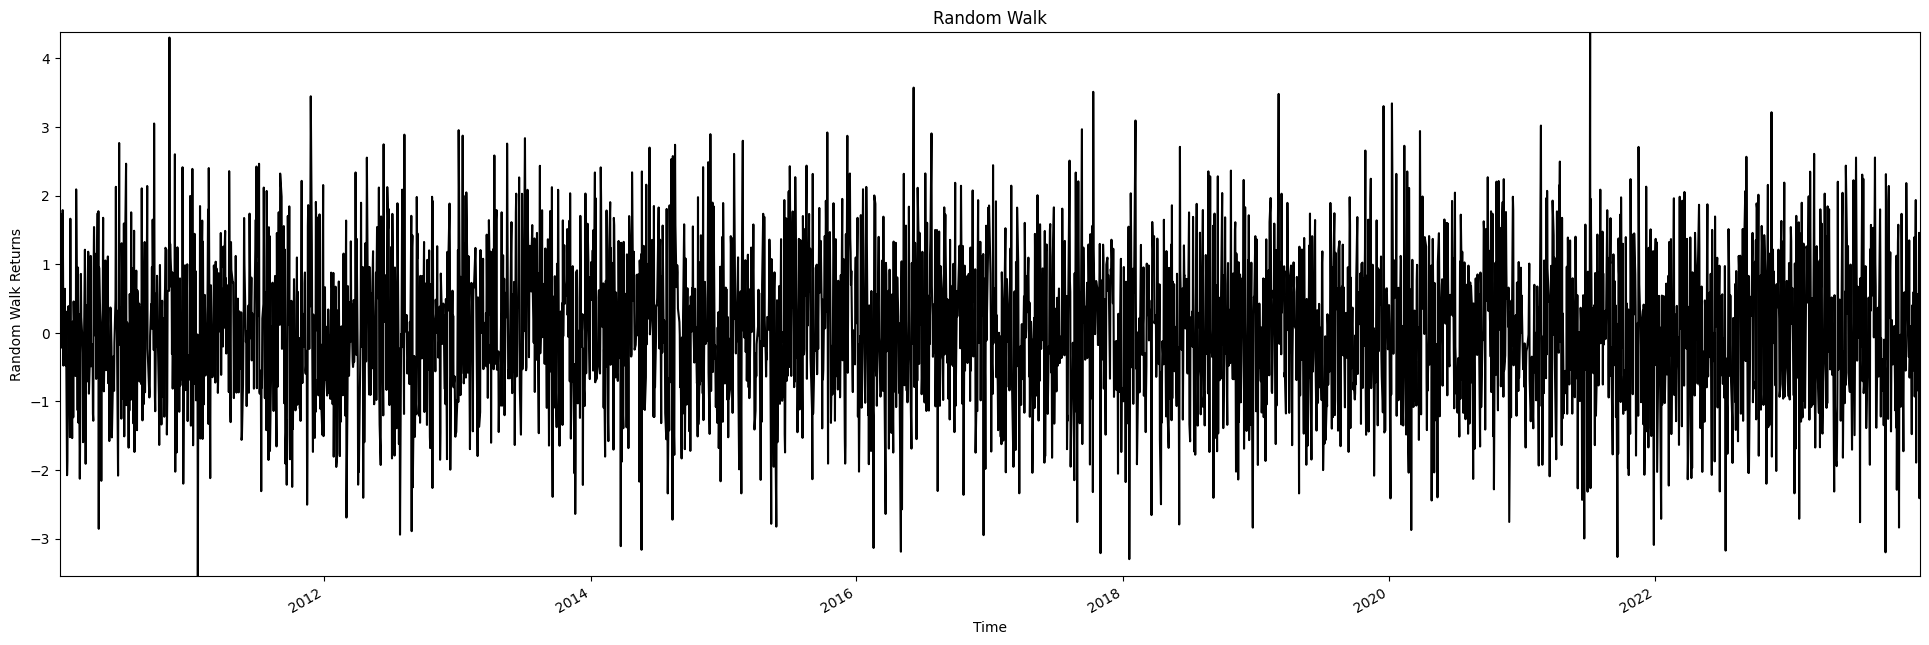

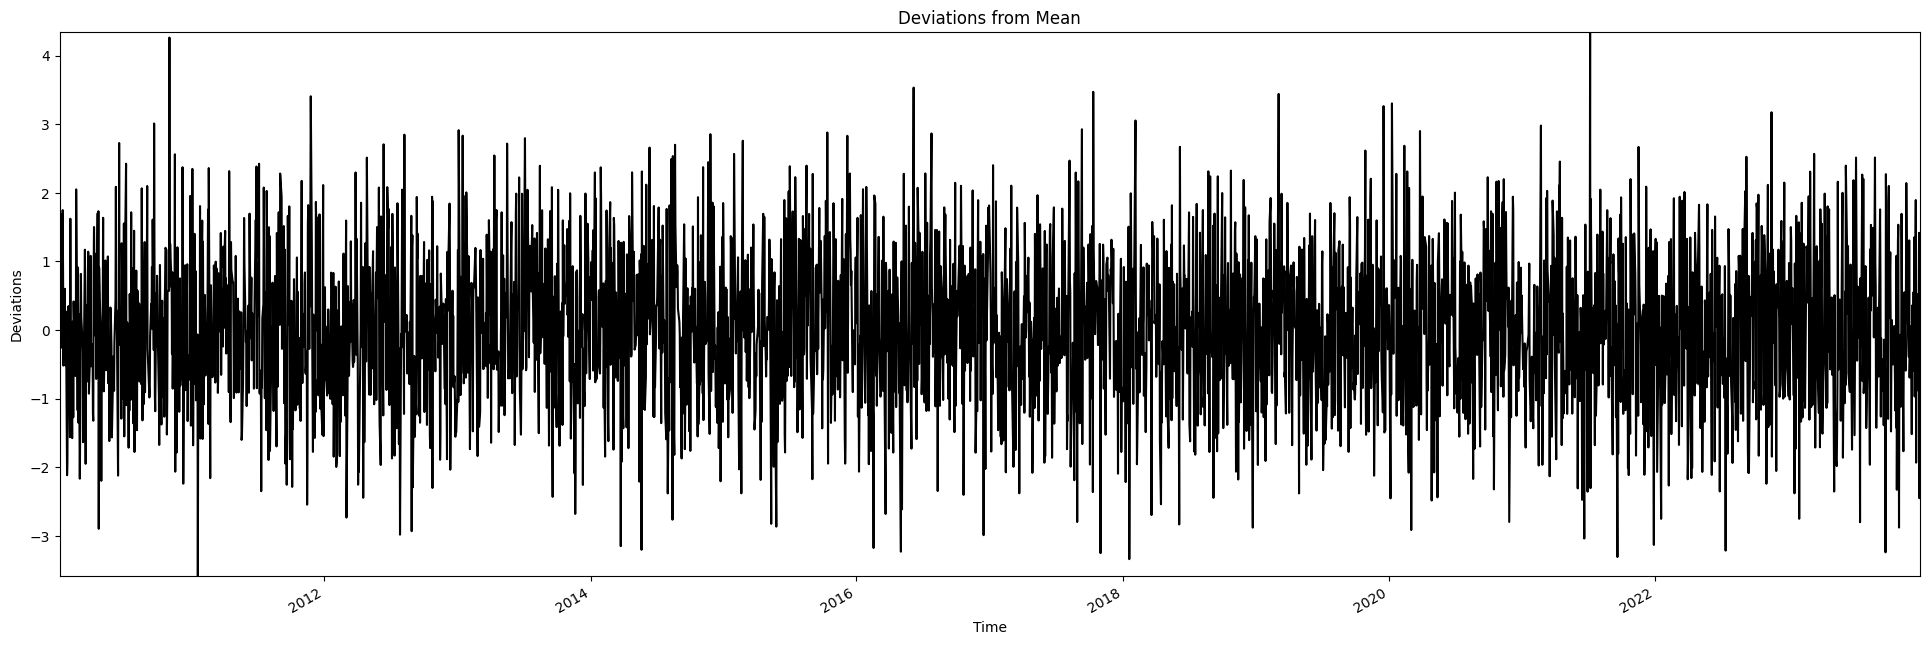

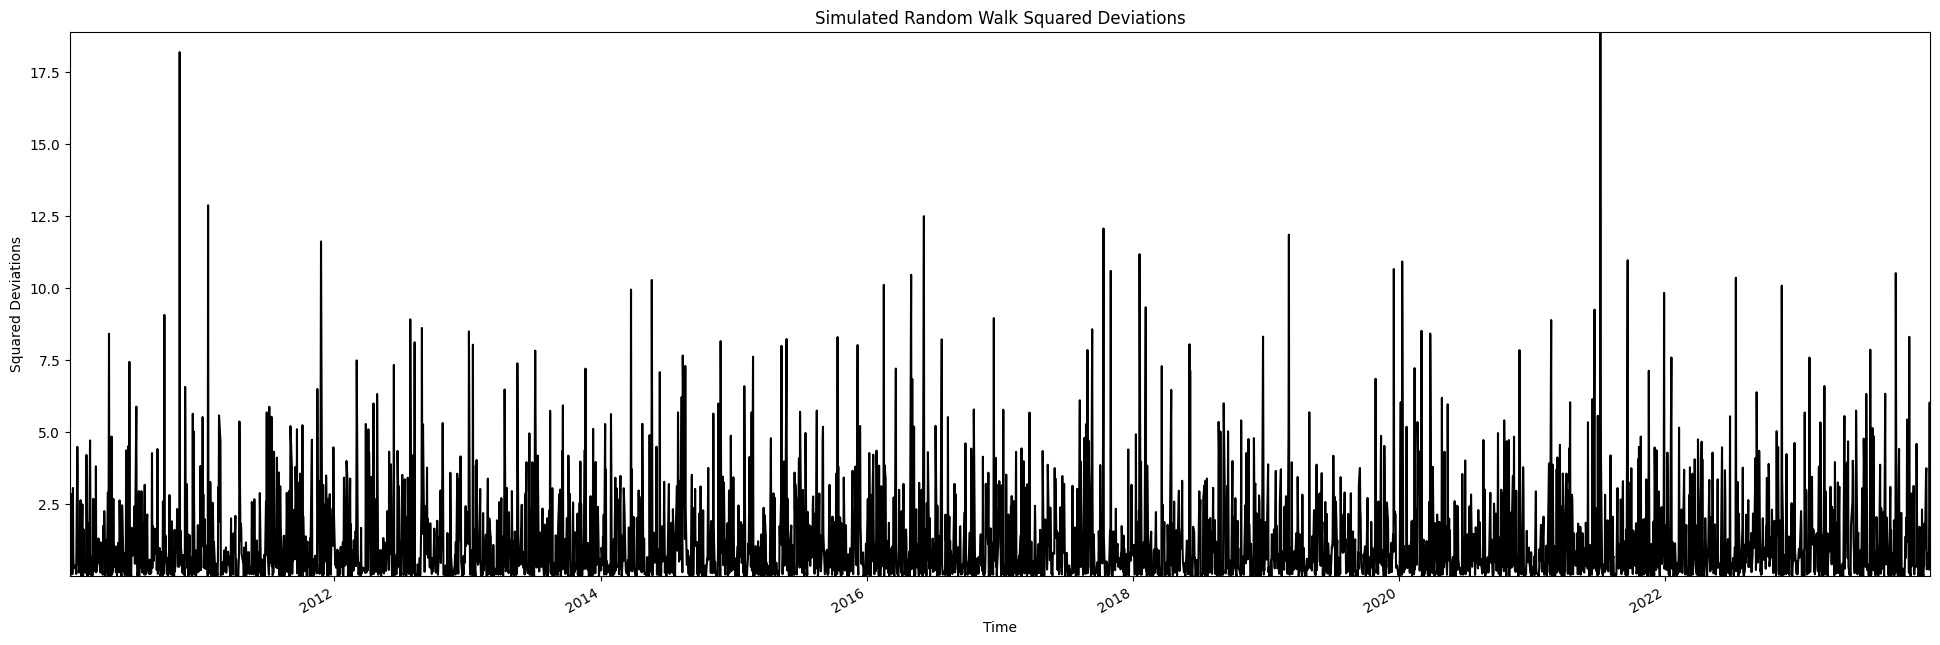

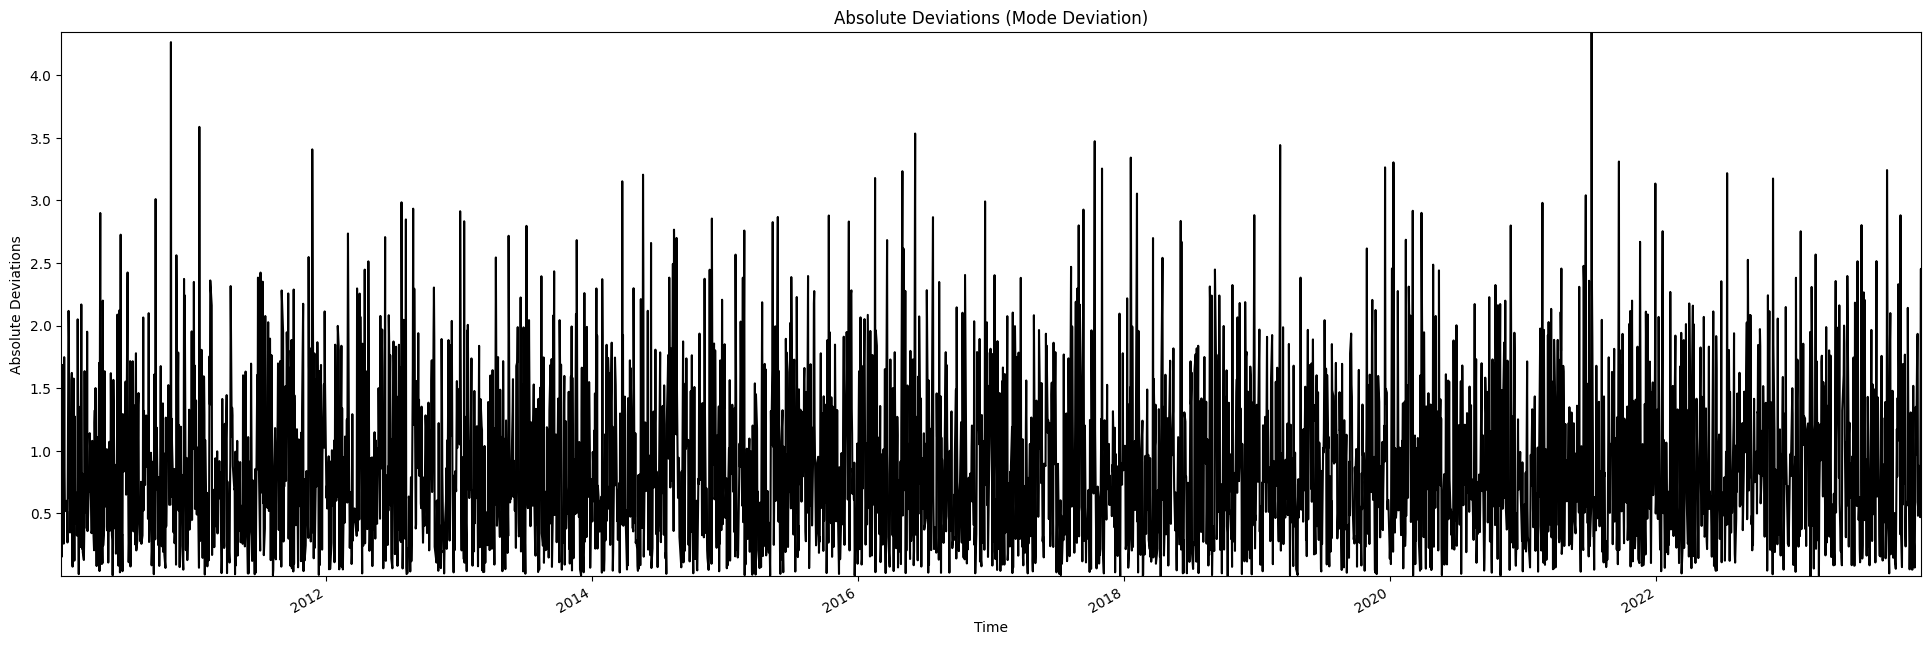

In [20]:
deviations = random_walk_df['rwreturns'] - mean
squared_deviations = deviations ** 2
absolute_deviations = np.abs(deviations)

# Step 2: Plot the random walk
plt.figure(figsize=(24, 8))
plt.autoscale(tight=True)
random_walk_df['rwreturns'].plot(color='black', title='Random Walk')
plt.xlabel('Time')
plt.ylabel('Random Walk Returns')
plt.show()

# Step 3: Plot deviations
plt.figure(figsize=(24, 8))
plt.autoscale(tight=True)
deviations.plot(color='black', title='Deviations from Mean')
plt.xlabel('Time')
plt.ylabel('Deviations')
plt.show()

# Step 4: Plot squared deviations
plt.figure(figsize=(24, 8))
plt.autoscale(tight=True)
squared_deviations.plot(color='black', title='Simulated Random Walk Squared Deviations')
plt.xlabel('Time')
plt.ylabel('Squared Deviations')
plt.show()

# Step 5: Plot absolute deviations (mode deviation)
plt.figure(figsize=(24, 8))
plt.autoscale(tight=True)
absolute_deviations.plot(color='black', title='Absolute Deviations (Mode Deviation)')
plt.xlabel('Time')
plt.ylabel('Absolute Deviations')
plt.show()


In [21]:
from arch import arch_model

In [25]:
model1 = arch_model(returns, p=1, q=1)

In [26]:
model_fit = model1.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15377633777.58666
Iteration:      2,   Func. Count:     15,   Neg. LLF: 723481807.197856
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6309.518127418996
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5117.550487243801
Iteration:      5,   Func. Count:     36,   Neg. LLF: 5357.820257493642
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4544.97948286125
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4544.974765353691
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4544.97325920681
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4544.973257587667
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4544.973257587475
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4544.973257587667
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:           SPX.Adjusted   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4544.97
Distribution:                  Normal   AIC:                           9097.95
Method:            Maximum Likelihood   BIC:                           9122.61
                                        No. Observations:                 3521
Date:                Mon, Mar 24 2025   Df Residuals:                     3520
Time:                        17:28:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0779  1.278e-02      6.096  1.088e-09 [5.285e-02,  0.103]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0365  7.585e-03      4.808  1.522e-06 [2.160e-02,5.133e-02]
alpha[1]       0.1720  2.208e-02      7.789  6.777e-15     [  0.129,  0.215]
beta[1]        0.7991  2.133e-02     37.471 2.731e-307     [  0.757,  0.841]
============================================================================

Covariance estimator: robust
"""

In [28]:
model1ar = arch_model(returns, 
    mean='ARX',       # Use ARX for ARMA/AR mean models
    lags=1,           # AR(1) lag
    vol='GARCH', 
    p=1, 
    q=1, 
    dist='normal')

In [29]:
model_fit1ar = model1ar.fit()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 72946.12857695235
Iteration:      2,   Func. Count:     19,   Neg. LLF: 23484.870284416233
Iteration:      3,   Func. Count:     30,   Neg. LLF: 25574.931980282312
Iteration:      4,   Func. Count:     40,   Neg. LLF: 7121.388538758186
Iteration:      5,   Func. Count:     48,   Neg. LLF: 7465.575100878122
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4555.800668937224
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4540.446263843347
Iteration:      8,   Func. Count:     68,   Neg. LLF: 4540.442248800819
Iteration:      9,   Func. Count:     74,   Neg. LLF: 4540.44214551885
Iteration:     10,   Func. Count:     80,   Neg. LLF: 4540.4421423520635
Iteration:     11,   Func. Count:     85,   Neg. LLF: 4540.442142352543
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4540.4421423520635
            Iterations: 11
            Function evaluations: 85
            Gradient evaluations:

In [31]:
model_fit1ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:           SPX.Adjusted   R-squared:                       0.008
Mean Model:                        AR   Adj. R-squared:                  0.008
Vol Model:                      GARCH   Log-Likelihood:               -4540.44
Distribution:                  Normal   AIC:                           9090.88
Method:            Maximum Likelihood   BIC:                           9121.72
                                        No. Observations:                 3520
Date:                Mon, Mar 24 2025   Df Residuals:                     3518
Time:                        17:34:23   Df Model:                            2
                                    Mean Model                                   
=================================================================================
                    coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------------
Const             0.0827  1.319e-02      6.267  3.682e-10     [5.683e-02,  0.109]
SPX....ted[1]    -0.0518  1.889e-02     -2.741  6.125e-03 [-8.879e-02,-1.475e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0362  7.505e-03      4.828  1.378e-06 [2.153e-02,5.094e-02]
alpha[1]       0.1726  2.243e-02      7.694  1.423e-14     [  0.129,  0.217]
beta[1]        0.7988  2.151e-02     37.138 6.838e-302     [  0.757,  0.841]
============================================================================

Covariance estimator: robust
"""

In [32]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on your return series
adf_result = adfuller(returns)

# Print results
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")


ADF Statistic: -12.908829096877101
p-value: 4.097976654150879e-24
Critical Value (1%): -3.432222956709344
Critical Value (5%): -2.8623675658475816
Critical Value (10%): -2.5672105277474606


In [33]:
garch_21 = arch_model(returns, mean='AR', lags=1, vol='GARCH', p=2, q=1)
garch_21_fit = garch_21.fit()
garch_21_fit.summary()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 68325.7100339978
Iteration:      2,   Func. Count:     21,   Neg. LLF: 24353.110140604556
Iteration:      3,   Func. Count:     33,   Neg. LLF: 23158.27472490521
Iteration:      4,   Func. Count:     44,   Neg. LLF: 7082.163083225827
Iteration:      5,   Func. Count:     53,   Neg. LLF: 4865.530591159575
Iteration:      6,   Func. Count:     62,   Neg. LLF: 4551.20776533875
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4564.196795476595
Iteration:      8,   Func. Count:     78,   Neg. LLF: 4544.329459693032
Iteration:      9,   Func. Count:     86,   Neg. LLF: 4542.994972853023
Iteration:     10,   Func. Count:     94,   Neg. LLF: 4538.692933634764
Iteration:     11,   Func. Count:    101,   Neg. LLF: 4538.692903017945
Iteration:     12,   Func. Count:    108,   Neg. LLF: 4538.692901835355
Iteration:     13,   Func. Count:    114,   Neg. LLF: 4538.692901835334
Optimization terminated successfully    (Exit mode 0)
           

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:           SPX.Adjusted   R-squared:                       0.008
Mean Model:                        AR   Adj. R-squared:                  0.008
Vol Model:                      GARCH   Log-Likelihood:               -4538.69
Distribution:                  Normal   AIC:                           9089.39
Method:            Maximum Likelihood   BIC:                           9126.38
                                        No. Observations:                 3520
Date:                Mon, Mar 24 2025   Df Residuals:                     3518
Time:                        19:15:02   Df Model:                            2
                                    Mean Model                                   
=================================================================================
                    coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------------
Const             0.0814  1.306e-02      6.231  4.641e-10     [5.579e-02,  0.107]
SPX....ted[1]    -0.0501  1.872e-02     -2.674  7.500e-03 [-8.676e-02,-1.337e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0416  9.484e-03      4.385  1.162e-05 [2.300e-02,6.017e-02]
alpha[1]       0.1405  3.640e-02      3.859  1.139e-04   [6.913e-02,  0.212]
alpha[2]       0.0519  4.226e-02      1.228      0.219  [-3.093e-02,  0.135]
beta[1]        0.7747  2.933e-02     26.412 9.901e-154     [  0.717,  0.832]
============================================================================

Covariance estimator: robust
"""

In [36]:
garch_12 = arch_model(returns, mean='AR', lags=1, vol='GARCH', p=1, q=2)
garch_12_fit = garch_12.fit()
garch_12_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 63121.19898204754
Iteration:      2,   Func. Count:     21,   Neg. LLF: 22962.931865854047
Iteration:      3,   Func. Count:     32,   Neg. LLF: 24613.048577048565
Iteration:      4,   Func. Count:     43,   Neg. LLF: 6850.059146754344
Iteration:      5,   Func. Count:     52,   Neg. LLF: 4730.431623287821
Iteration:      6,   Func. Count:     60,   Neg. LLF: 2814033.282497749
Iteration:      7,   Func. Count:     68,   Neg. LLF: 4543.913094731183
Iteration:      8,   Func. Count:     75,   Neg. LLF: 4542.230783503998
Iteration:      9,   Func. Count:     82,   Neg. LLF: 4542.117883915174
Iteration:     10,   Func. Count:     90,   Neg. LLF: 4541.620899590005
Iteration:     11,   Func. Count:     98,   Neg. LLF: 4540.488774883671
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4540.44230072386
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4540.442145349665
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4540.4421

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:           SPX.Adjusted   R-squared:                       0.008
Mean Model:                        AR   Adj. R-squared:                  0.008
Vol Model:                      GARCH   Log-Likelihood:               -4540.44
Distribution:                  Normal   AIC:                           9092.88
Method:            Maximum Likelihood   BIC:                           9129.88
                                        No. Observations:                 3520
Date:                Mon, Mar 24 2025   Df Residuals:                     3518
Time:                        19:16:30   Df Model:                            2
                                    Mean Model                                   
=================================================================================
                    coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------------
Const             0.0827  1.313e-02      6.297  3.035e-10     [5.695e-02,  0.108]
SPX....ted[1]    -0.0518  1.887e-02     -2.743  6.095e-03 [-8.876e-02,-1.477e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0362  8.069e-03      4.490  7.110e-06 [2.042e-02,5.205e-02]
alpha[1]       0.1726  2.989e-02      5.774  7.758e-09     [  0.114,  0.231]
beta[1]        0.7988      0.184      4.337  1.443e-05     [  0.438,  1.160]
beta[2]    1.1071e-16      0.161  6.869e-16      1.000     [ -0.316,  0.316]
============================================================================

Covariance estimator: robust
"""

In [37]:
from arch import arch_model

model_ar1_garch22 = arch_model(
    returns,
    mean='ARX',     # AR(1) mean model
    lags=1,
    vol='GARCH',    # GARCH model for volatility
    p=2,            # ARCH terms (lagged squared residuals)
    q=2,            # GARCH terms (lagged conditional variances)
)

fit_ar1_garch22 = model_ar1_garch22.fit()
fit_ar1_garch22.summary()


Iteration:      1,   Func. Count:      9,   Neg. LLF: 142749.78613628092
Iteration:      2,   Func. Count:     22,   Neg. LLF: 61504.61684355171
Iteration:      3,   Func. Count:     34,   Neg. LLF: 52622.80198200372
Iteration:      4,   Func. Count:     46,   Neg. LLF: 6712.800779999849
Iteration:      5,   Func. Count:     56,   Neg. LLF: 6332.285399711829
Iteration:      6,   Func. Count:     65,   Neg. LLF: 5657.929128895832
Iteration:      7,   Func. Count:     75,   Neg. LLF: 4817.848579164654
Iteration:      8,   Func. Count:     84,   Neg. LLF: 4548.510569381127
Iteration:      9,   Func. Count:     93,   Neg. LLF: 4543.650699094887
Iteration:     10,   Func. Count:    102,   Neg. LLF: 4543.330328978109
Iteration:     11,   Func. Count:    111,   Neg. LLF: 4538.201342636513
Iteration:     12,   Func. Count:    119,   Neg. LLF: 4538.190866567105
Iteration:     13,   Func. Count:    127,   Neg. LLF: 4538.187989533806
Iteration:     14,   Func. Count:    135,   Neg. LLF: 4538.1874

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:           SPX.Adjusted   R-squared:                       0.008
Mean Model:                        AR   Adj. R-squared:                  0.008
Vol Model:                      GARCH   Log-Likelihood:               -4538.19
Distribution:                  Normal   AIC:                           9090.37
Method:            Maximum Likelihood   BIC:                           9133.54
                                        No. Observations:                 3520
Date:                Mon, Mar 24 2025   Df Residuals:                     3518
Time:                        19:19:40   Df Model:                            2
                                    Mean Model                                   
=================================================================================
                    coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------------
Const             0.0808  1.316e-02      6.144  8.043e-10     [5.504e-02,  0.107]
SPX....ted[1]    -0.0477  1.887e-02     -2.526  1.154e-02 [-8.466e-02,-1.068e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0635  1.786e-02      3.557  3.758e-04 [2.851e-02,9.851e-02]
alpha[1]       0.1430  3.466e-02      4.127  3.676e-05   [7.511e-02,  0.211]
alpha[2]       0.1505  5.262e-02      2.861  4.228e-03   [4.739e-02,  0.254]
beta[1]        0.1394      0.403      0.346      0.729     [ -0.650,  0.928]
beta[2]        0.5154      0.333      1.549      0.121     [ -0.137,  1.168]
============================================================================

Covariance estimator: robust
"""

In [ ]:
from arch import arch_model

model_ar1_garch22 = arch_model(
    returns,
    mean='ARX',     # AR(1) mean model
    lags=1,
    vol='GARCH',    # GARCH model for volatility
    p=2,            # ARCH terms (lagged squared residuals)
    q=2,            # GARCH terms (lagged conditional variances)
    dist='normal'   # or 't' for Student's t if you want fat tails
)

fit_ar1_garch22 = model_ar1_garch22.fit()
print(fit_ar1_garch22.summary())


In [40]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fit ARMA(1,1) to the returns
arma_model = ARIMA(returns, order=(1, 0, 1)).fit()
resid = arma_model.resid

# Step 2: Fit GARCH(1,1) to the residuals
model_arma_garch = arch_model(
    resid,
    mean='Zero',
    vol='GARCH',
    p=1,
    q=1,
)
fit_arma_garch = model_arma_garch.fit()


/Users/ekanshlakhyani/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ekanshlakhyani/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ekanshlakhyani/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Iteration:      1,   Func. Count:      5,   Neg. LLF: 20234.687628264182
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6971.255276914355
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7575.400022032434
Iteration:      4,   Func. Count:     26,   Neg. LLF: 4723.25467841503
Iteration:      5,   Func. Count:     31,   Neg. LLF: 4555.646940389837
Iteration:      6,   Func. Count:     35,   Neg. LLF: 4555.629144225288
Iteration:      7,   Func. Count:     39,   Neg. LLF: 4555.629063317829
Iteration:      8,   Func. Count:     42,   Neg. LLF: 4555.629063319811
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4555.629063317829
            Iterations: 8
            Function evaluations: 42
            Gradient evaluations: 8


In [41]:
fit_arma_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4555.63
Distribution:                  Normal   AIC:                           9117.26
Method:            Maximum Likelihood   BIC:                           9135.76
                                        No. Observations:                 3521
Date:                Mon, Mar 24 2025   Df Residuals:                     3521
Time:                        19:26:15   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0361  7.565e-03      4.779  1.764e-06 [2.132e-02,5.098e-02]
alpha[1]       0.1715  2.185e-02      7.850  4.150e-15     [  0.129,  0.214]
beta[1]        0.7997  2.135e-02     37.460 4.189e-307     [  0.758,  0.842]
============================================================================

Covariance estimator: robust
"""

In [42]:
# Get the MA(1) coefficient and p-value
ma_coef = arma_model.params['ma.L1']
ma_pval = arma_model.pvalues['ma.L1']

print(f"MA(1) Coefficient: {ma_coef}")
print(f"MA(1) p-value: {ma_pval}")


MA(1) Coefficient: 0.32681716243024267
MA(1) p-value: 2.6502911723573444e-12


In [43]:
model_ar2 = arch_model(
    returns,
    mean='ARX',
    lags=2,
    vol='GARCH',
    p=1,
    q=1,
    dist='normal'
)
fit_ar2 = model_ar2.fit()
fit_ar2.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 76658.37841094022
Iteration:      2,   Func. Count:     21,   Neg. LLF: 29101.89361700009
Iteration:      3,   Func. Count:     33,   Neg. LLF: 22073.950317307033
Iteration:      4,   Func. Count:     44,   Neg. LLF: 9516.121349557834
Iteration:      5,   Func. Count:     53,   Neg. LLF: 197574.48844967235
Iteration:      6,   Func. Count:     63,   Neg. LLF: 9066.878270962781
Iteration:      7,   Func. Count:     71,   Neg. LLF: 4850.25895171242
Iteration:      8,   Func. Count:     79,   Neg. LLF: 4540.078193930669
Iteration:      9,   Func. Count:     87,   Neg. LLF: 4541.290574185412
Iteration:     10,   Func. Count:     95,   Neg. LLF: 4539.635032346376
Iteration:     11,   Func. Count:    102,   Neg. LLF: 4539.634973289914
Iteration:     12,   Func. Count:    109,   Neg. LLF: 4539.634972475235
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4539.634972475235
            Iterations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:           SPX.Adjusted   R-squared:                       0.008
Mean Model:                        AR   Adj. R-squared:                  0.007
Vol Model:                      GARCH   Log-Likelihood:               -4539.63
Distribution:                  Normal   AIC:                           9091.27
Method:            Maximum Likelihood   BIC:                           9128.27
                                        No. Observations:                 3519
Date:                Mon, Mar 24 2025   Df Residuals:                     3516
Time:                        19:58:21   Df Model:                            3
                                    Mean Model                                    
==================================================================================
                     coef    std err          t      P>|t|        95.0% Conf. Int.
----------------------------------------------------------------------------------
Const              0.0830  1.348e-02      6.153  7.605e-10     [5.654e-02,  0.109]
SPX....ted[1]     -0.0519  1.893e-02     -2.740  6.152e-03 [-8.895e-02,-1.476e-02]
SPX....ted[2] -3.2358e-03  1.888e-02     -0.171      0.864  [-4.024e-02,3.377e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0361  7.493e-03      4.824  1.407e-06 [2.146e-02,5.083e-02]
alpha[1]       0.1721  2.245e-02      7.668  1.745e-14     [  0.128,  0.216]
beta[1]        0.7992  2.152e-02     37.134 8.072e-302     [  0.757,  0.841]
============================================================================

Covariance estimator: robust
"""

In [45]:
returns.head

<bound method NDFrame.head of Index
2010-01-05    0.311083
2010-01-06    0.054537
2010-01-07    0.399322
2010-01-08    0.287758
2010-01-11    0.174523
                ...   
2023-12-22    0.165868
2023-12-26    0.422276
2023-12-27    0.142944
2023-12-28    0.037011
2023-12-29   -0.283048
Name: SPX.Adjusted, Length: 3521, dtype: float64>

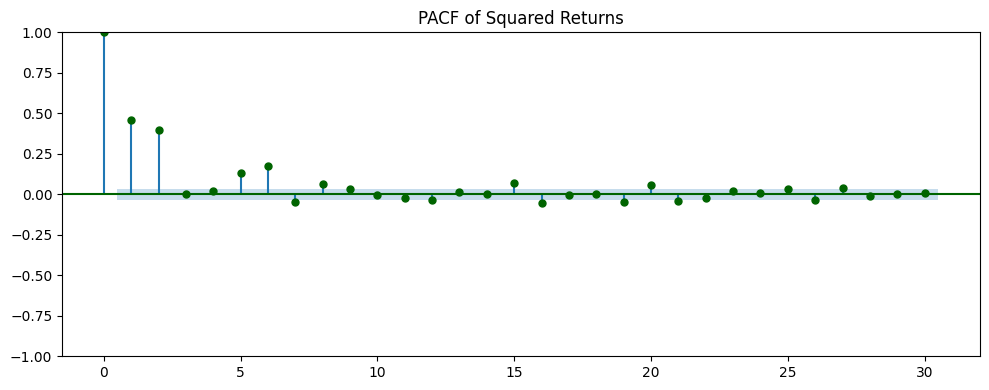

In [51]:
squared_returns = returns ** 2

# Step 2: Plot the PACF
fig, ax = plt.subplots(figsize=(10, 4))
plot_pacf(squared_returns, lags=30, ax=ax, method='ywm', color='darkgreen')
plt.title("PACF of Squared Returns")
plt.tight_layout()

# Step 3: Save the plot
plt.savefig("PACF_Squared_Returns.png")
plt.show()

In [53]:
import pandas as pd

# Step 1: Load and prepare earthquake data
eq_df = pd.read_csv("EQ_US.csv")  # update with your actual file path
eq_df["time"] = pd.to_datetime(eq_df["time"])
eq_df["date"] = eq_df["time"].dt.date

# Step 2: Filter earthquakes by magnitude (e.g., ≥ 4.5)
eq_df_filtered = eq_df[eq_df["mag"] >= 4.5].copy()
eq_df_filtered["earthquake_dummy"] = 1

# Step 3: Remove duplicate dates (if multiple quakes on same day)
eq_daily = eq_df_filtered[["date", "earthquake_dummy"]].drop_duplicates(subset="date")

# Step 4: Prepare your returns series
# Make sure your 'returns' series is already defined
# And its index is datetime-like
returns_clean = returns.copy()
returns_clean.index = pd.to_datetime(returns_clean.index).date
returns_clean.name = "returns"

# Step 5: Merge earthquake dummy with returns
merged_df = pd.DataFrame(returns_clean)
merged_df["date"] = merged_df.index
merged_df = merged_df.merge(eq_daily, on="date", how="left")
merged_df["earthquake_dummy"] = merged_df["earthquake_dummy"].fillna(0).astype(int)

# Step 6: Set the index back to datetime if needed
merged_df.set_index("date", inplace=True)

# Done — inspect result
merged_df.head()


,returns,earthquake_dummy
date,,
2010-01-05,0.311083,0
2010-01-06,0.054537,0
2010-01-07,0.399322,0
2010-01-08,0.287758,0
2010-01-11,0.174523,0


In [54]:
earthquake_days = merged_df[merged_df["earthquake_dummy"] == 1]

In [55]:
earthquake_days.head()

,returns,earthquake_dummy
date,,
2010-02-04,-3.163586,1
2010-03-30,0.004266,1
2010-04-05,0.789673,1
2010-04-06,0.168288,1
2010-04-08,0.336866,1


In [65]:
earthquake_days

,returns,earthquake_dummy
date,,
2010-02-04,-3.163586,1
2010-03-30,0.004266,1
2010-04-05,0.789673,1
2010-04-06,0.168288,1
2010-04-08,0.336866,1
...,...,...
2023-09-19,-0.215333,1
2023-10-16,1.053864,1
2023-11-08,0.100441,1


In [61]:
import statsmodels.api as sm

# STEP 1: Fit the baseline GARCH(1,1)
from arch import arch_model

garch_model = arch_model(returns, mean='AR', lags=1, vol='GARCH', p=1, q=1)
garch_fit = garch_model.fit()

# STEP 2: Extract fitted conditional variances
fitted_variance = garch_fit.conditional_volatility ** 2  # σ_t^2

# Align with earthquake dummy
variance_df = pd.DataFrame({
    "variance": fitted_variance,
    "earthquake": quake_dummy
}).dropna()

# STEP 3: Run regression of variance on earthquake dummy
X = sm.add_constant(variance_df["earthquake"])  # add intercept
y = variance_df["variance"]

ols_model = sm.OLS(y, X).fit()
ols_model.summary()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 72946.12857695235
Iteration:      2,   Func. Count:     19,   Neg. LLF: 23484.870284416233
Iteration:      3,   Func. Count:     30,   Neg. LLF: 25574.931980282312
Iteration:      4,   Func. Count:     40,   Neg. LLF: 7121.388538758186
Iteration:      5,   Func. Count:     48,   Neg. LLF: 7465.575100878122
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4555.800668937224
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4540.446263843347
Iteration:      8,   Func. Count:     68,   Neg. LLF: 4540.442248800819
Iteration:      9,   Func. Count:     74,   Neg. LLF: 4540.44214551885
Iteration:     10,   Func. Count:     80,   Neg. LLF: 4540.4421423520635
Iteration:     11,   Func. Count:     85,   Neg. LLF: 4540.442142352543
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4540.4421423520635
            Iterations: 11
            Function evaluations: 85
            Gradient evaluations:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               variance   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.166
Date:                Tue, 25 Mar 2025   Prob (F-statistic):             0.0131
Time:                        00:14:43   Log-Likelihood:                -8295.2
No. Observations:                3520   AIC:                         1.659e+04
Df Residuals:                    3518   BIC:                         1.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1953      0.044     26.903      0.000       1.108       1.282
earthquake     0.4475      0.180      2.483      0.013       0.094       0.801
==============================================================================
Omnibus:                     6010.883   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4932369.025
Skew:                          11.728   Prob(JB):                         0.00
Kurtosis:                     184.878   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model = arch_model(returns, vol='GARCH', p=1, q=1, mean='AR', lags=1)
fit = model.fit(disp="off")

# Step 2: Extract GARCH-predicted conditional variance (σ_t²)
predicted_volatility = fit.conditional_volatility ** 2

# Step 3: Compute realized volatility (residual squared)
residuals = fit.resid
realized_volatility = residuals ** 2

# Step 4: Define the "surprise" = actual - predicted
volatility_surprise = realized_volatility - predicted_volatility

# Step 5: Create your earthquake dummy (already merged with returns)
# quake_dummy = merged_df['earthquake_dummy']  ← Use your real dummy here
# For demo only:
# quake_dummy = pd.Series(np.random.binomial(1, 0.02, len(returns)))

# Step 6: Run regression to test if surprises are higher on earthquake days
X = sm.add_constant(quake_dummy)
ols = sm.OLS(volatility_surprise, X).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 25 Mar 2025   Prob (F-statistic):                nan
Time:                        02:01:35   Log-Likelihood:                    nan
No. Observations:                3521   AIC:                               nan
Df Residuals:                    3519   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                   nan        nan        nan        nan         nan         nan
earthquake_dummy        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

count    3520.000000
mean       -0.007972
std         3.925658
min       -44.393306
25%        -0.685400
50%        -0.328813
75%         0.079061
max       115.461351
dtype: float64

In [69]:
# Step 6.1: Reset index and drop NaNs
quake_dummy = quake_dummy.reset_index(drop=True)
volatility_surprise = volatility_surprise.reset_index(drop=True)

# Step 6.2: Remove any potential NaNs (safety check)
mask = (~quake_dummy.isna()) & (~volatility_surprise.isna())
X = sm.add_constant(quake_dummy[mask])
y = volatility_surprise[mask]

# Step 6.3: Run regression
ols = sm.OLS(y, X).fit()
ols.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3958
Date:                Tue, 25 Mar 2025   Prob (F-statistic):              0.529
Time:                        02:11:50   Log-Likelihood:                -9807.7
No. Observations:                3520   AIC:                         1.962e+04
Df Residuals:                    3518   BIC:                         1.963e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0026      0.068      0.038      0.969      -0.131       0.136
earthquake_dummy    -0.1742      0.277     -0.629      0.529      -0.717       0.369
==============================================================================
Omnibus:                     6318.818   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15620714.213
Skew:                          12.515   Prob(JB):                         0.00
Kurtosis:                     328.390   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Step 1: Shift the dummy
quake_dummy_next_day = quake_dummy.shift(1)

# Step 2: Combine and drop rows with NaNs
df = pd.concat([volatility_surprise, quake_dummy_next_day], axis=1).dropna()
y = df.iloc[:, 0]  # volatility_surprise
X = sm.add_constant(df.iloc[:, 1])  # shifted dummy with constant

# Step 3: Run regression
ols = sm.OLS(y, X).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5691
Date:                Tue, 25 Mar 2025   Prob (F-statistic):              0.451
Time:                        03:52:40   Log-Likelihood:                -9807.6
No. Observations:                3520   AIC:                         1.962e+04
Df Residuals:                    3518   BIC:                         1.963e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0047      0.068      0.069      0.945      -0.129       0.139
earthquake_dummy    -0.2089      0.277     -0.754      0.451      -0.752       0.334
==============================================================================
Omnibus:                     6319.881   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15614117.419
Skew:                          12.520   Prob(JB):                         0.00
Kurtosis:                     328.320   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

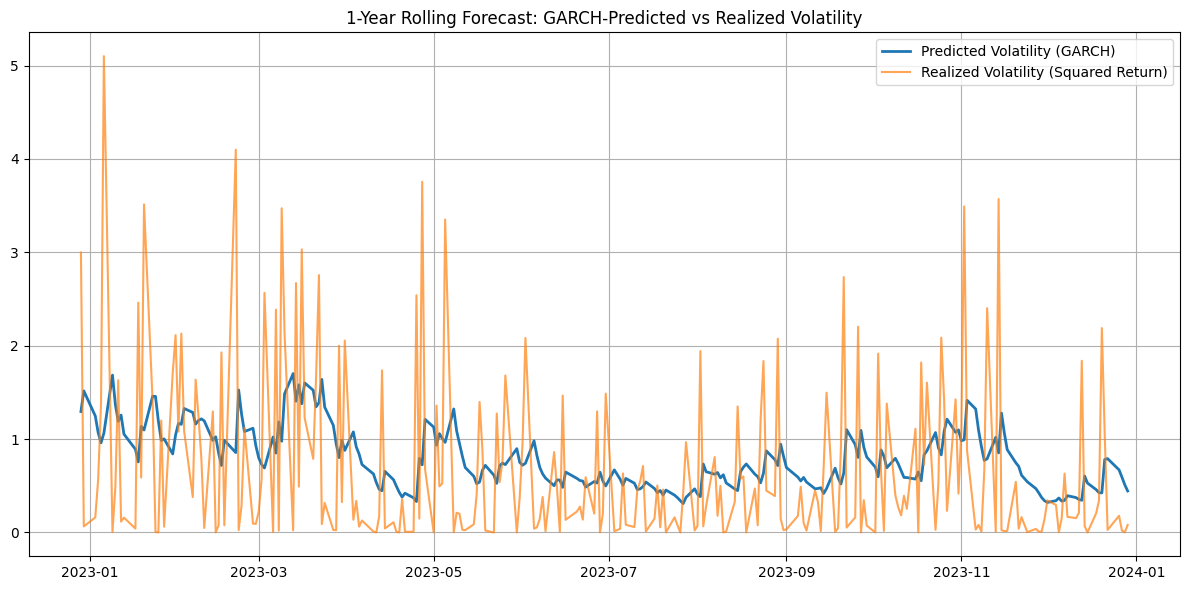

RMSE: 0.936722


In [76]:

from sklearn.metrics import mean_squared_error

# Assuming `returns` is your return series with datetime index
# Example: returns = df['SPX.Adjusted']

# Step 1: Define the testing period (last 1 year ≈ 252 trading days)
forecast_days = 252
train = returns.iloc[:-forecast_days]
test = returns.iloc[-forecast_days:]

# Step 2: Rolling forecast
predicted_vols = []
realized_vols = []

for i in range(forecast_days):
    rolling_data = returns.iloc[:-(forecast_days - i)]
    model = arch_model(rolling_data, vol='GARCH', p=1, q=1, mean='AR', lags=1)
    fit = model.fit(disp="off")
    
    forecast = fit.forecast(horizon=1)
    predicted_vol = forecast.variance.values[-1, 0]
    realized_vol = test.iloc[i] ** 2

    predicted_vols.append(predicted_vol)
    realized_vols.append(realized_vol)

# Step 3: Convert to Series
predicted_vols = pd.Series(predicted_vols, index=test.index)
realized_vols = pd.Series(realized_vols, index=test.index)

# Step 4: Plot
plt.figure(figsize=(12, 6))
plt.plot(predicted_vols, label='Predicted Volatility (GARCH)', linewidth=2)
plt.plot(realized_vols, label='Realized Volatility (Squared Return)', alpha=0.7)
plt.title("1-Year Rolling Forecast: GARCH-Predicted vs Realized Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Evaluate
rmse = np.sqrt(mean_squared_error(realized_vols, predicted_vols))
print(f"RMSE: {rmse:.6f}")



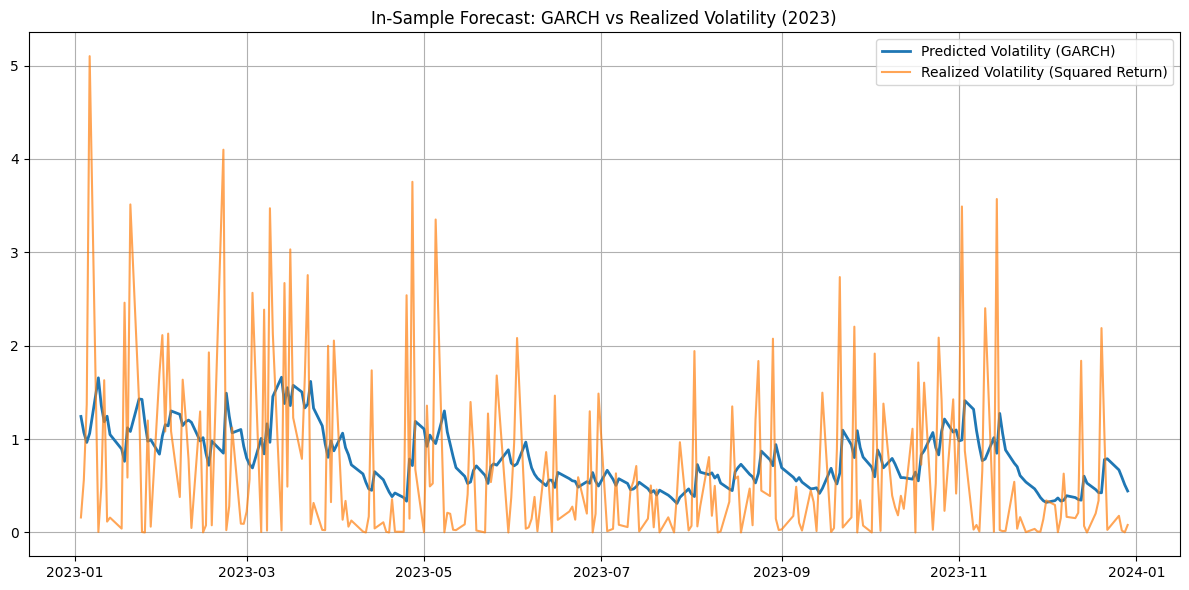

In-Sample RMSE (2023): 0.927730


In [77]:
# Fit GARCH(1,1) on the entire returns data
full_model = arch_model(returns, vol='GARCH', p=1, q=1, mean='AR', lags=1)
full_fit = full_model.fit(disp="off")

# Predicted conditional variance (in-sample)
conditional_var = full_fit.conditional_volatility ** 2

# Realized volatility = squared returns
realized_vol = returns ** 2

# Select only 2023 data
start_2023 = '2023-01-01'
end_2023 = '2023-12-31'

predicted_2023 = conditional_var.loc[start_2023:end_2023]
realized_2023 = realized_vol.loc[start_2023:end_2023]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(predicted_2023, label='Predicted Volatility (GARCH)', linewidth=2)
plt.plot(realized_2023, label='Realized Volatility (Squared Return)', alpha=0.7)
plt.title("In-Sample Forecast: GARCH vs Realized Volatility (2023)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# RMSE
from sklearn.metrics import mean_squared_error
rmse_in_sample = np.sqrt(mean_squared_error(realized_2023, predicted_2023))
print(f"In-Sample RMSE (2023): {rmse_in_sample:.6f}")


In [78]:


# Step 1: Compute realized volatility (squared returns)
realized_volatility = returns ** 2

# Step 2: Ensure your earthquake dummy is aligned and cleaned
# Assuming 'quake_dummy' is already merged and aligned with 'returns'
quake_dummy = merged_df['earthquake_dummy'].loc[returns.index]

# Drop any rows with missing values
data = pd.DataFrame({
    'realized_volatility': realized_volatility,
    'earthquake_dummy': quake_dummy
}).dropna()

# Step 3: Run OLS regression
X = sm.add_constant(data['earthquake_dummy'])  # Add intercept
y = data['realized_volatility']
ols_model = sm.OLS(y, X).fit()

# Step 4: Summary of regression
ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     realized_volatility   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.7047
Date:                 Tue, 25 Mar 2025   Prob (F-statistic):              0.401
Time:                         10:22:50   Log-Likelihood:                -10484.
No. Observations:                 3521   AIC:                         2.097e+04
Df Residuals:                     3519   BIC:                         2.098e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2092      0.083     14.628      0.000       1.047       1.371
earthquake_dummy     0.2815      0.335      0.839      0.401      -0.376       0.939
==============================================================================
Omnibus:                     7499.055   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35518580.201
Skew:                          18.373   Prob(JB):                         0.00
Kurtosis:                     493.666   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:


# Fit AR(1) - GARCH(1,1) model with Student's t-distribution
model_t = arch_model(
    returns,
    vol='GARCH',
    p=1,
    q=1,
    mean='AR',
    lags=1,
    dist='t'  # Use Student's t-distribution
)

fit_t = model_t.fit(disp='off')

# Print model summary
fit_t.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                 SPX.Adjusted   R-squared:                       0.007
Mean Model:                              AR   Adj. R-squared:                  0.007
Vol Model:                            GARCH   Log-Likelihood:               -4439.39
Distribution:      Standardized Student's t   AIC:                           8890.77
Method:                  Maximum Likelihood   BIC:                           8927.77
                                              No. Observations:                 3520
Date:                      Tue, Mar 25 2025   Df Residuals:                     3518
Time:                              10:43:26   Df Model:                            2
                                    Mean Model                                   
=================================================================================
                    coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------------
Const             0.0972  1.148e-02      8.467  2.523e-17     [7.471e-02,  0.120]
SPX....ted[1]    -0.0485  1.680e-02     -2.888  3.880e-03 [-8.146e-02,-1.559e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0228  5.117e-03      4.447  8.710e-06 [1.272e-02,3.278e-02]
alpha[1]       0.1699  2.003e-02      8.481  2.242e-17     [  0.131,  0.209]
beta[1]        0.8242  1.788e-02     46.094      0.000     [  0.789,  0.859]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.5052      0.507     10.857  1.838e-27 [  4.511,  6.499]
========================================================================

Covariance estimator: robust
"""